In [1]:
import numpy as np
import torch
import torch.nn as nn
from training import train
from NP import NP
import matplotlib.pyplot as plt

In [2]:
def f(point, alpha):
    return np.sin(point*alpha)

num_datapoints = 1000
alpha_range = [-2, 2]
x_dimension = 1
y_dimension = 1

mesh = torch.linspace(-2, 2, 100).unsqueeze(0).transpose(0,1)
datapoints = []
for _ in range(num_datapoints):
    num = np.random.uniform(alpha_range[0], alpha_range[1])
    value = f(mesh, num)
    datapoints.append([mesh, value])

points = np.random.choice(100, 10)
testpoints = [mesh[points], f(mesh[points], 1/2)]

In [3]:
model = NP(3, 1, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-3)

In [4]:
def sample_plot(np, context, linspace):
    context_x = context[0]
    context_y = context[1]
    
    mu, sigma, log_p, en_dist, t_en_dist, MSE  = np(context_x, context_y, linspace)
    low = mu-sigma
    high = mu+sigma
    plt.plot(linspace.transpose(0,1).squeeze().numpy(), mu.transpose(0,1).squeeze().detach().numpy())
    plt.fill_between(linspace.transpose(0,1).squeeze().numpy(), low.transpose(0,1).squeeze().detach().numpy(), high.transpose(0,1).squeeze().detach().numpy(), facecolor='#65c9f7', interpolate=True)
    plt.scatter(context[0], context[1], c='black')
    plt.show()

0
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete. Average loss = 0.78512948751449585
EPOCH LOSS 0.7851294875144958
Epoch 2 Progress: |██████████████████████████████████████████████████| 100.0% Complete. Average loss = 0.145347326993942267
EPOCH LOSS 0.14534732699394226
Epoch 3 Progress: |██████████████████████████████████████████████████| 100.0% Complete. Average loss = -0.0603614300489425667
EPOCH LOSS -0.060361430048942566
Epoch 4 Progress: |██████████████████████████████████████████████████| 100.0% Complete. Average loss = -0.0744940862059593245
EPOCH LOSS -0.07449408620595932
Epoch 5 Progress: |██████████████████████████████████████████████████| 100.0% Complete. Average loss = -0.187561705708503726
EPOCH LOSS -0.18756170570850372


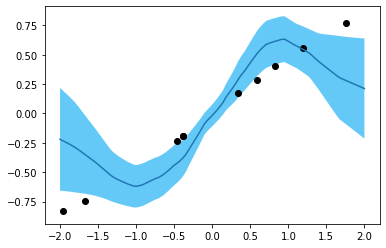

5
Epoch 1 Progress: |██████████████████████████████████████████████████| 100.0% Complete. Average loss = -0.237571030855178837
EPOCH LOSS -0.23757103085517883


KeyboardInterrupt: 

In [6]:
for i in range(30):
    print(5*i)
    train(datapoints, model, 5, 99, 1, optimizer)
    sample_plot(model, testpoints, mesh)

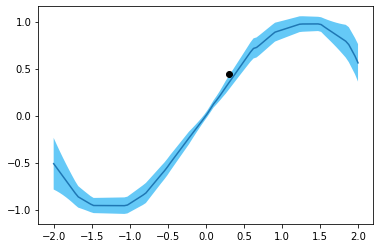

In [100]:
points = np.random.choice(100, 1)
testpoints = [mesh[points], f(mesh[points], 1.5)]
sample_plot(model, testpoints, mesh)